## Data-Cleaning

### Objective

To evaluate the structural and statistical quality of the provided dataset and perform necessary preprocessing steps including:
    - Missing value handling
    - Outlier detection
    - Data type validation
    - Consistency checks

The goal is to ensure the dataset is suitable for downstream machine learning modeling.

### Data Source

**Raw Dataset**: https://www.kaggle.com/datasets/amrmaree/student-performance-prediction

The dataset claims to simulate realistic student academic behavior and performance outcomes.

#### Importing Required Packages

In [2]:
# Importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Analysis
This section aims to load the dataset and derive basic information about the dataset. Like the number of features, non-null values, shape of the data-frame and etc.

1. Loading the Dataset

In [4]:
# Loading the dataset
df = pd.read_csv('../data/raw/student_performance_dataset.csv')
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


2. Analysis

In [5]:

df.info()
df.shape

<class 'pandas.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    str    
 1   Gender                      708 non-null    str    
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    str    
 6   Internet_Access_at_Home     708 non-null    str    
 7   Extracurricular_Activities  708 non-null    str    
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    str    
dtypes: float64(1), int64(3), str(6)
memory usage: 55.4 KB


(708, 10)

#### Data Analysis Summary
- Total Features: 10
- Target Variables: Final_Exam_Score, Pass_Fail
- Total Records: 708
- Missing Values: None detected
- Data Types: Mix of numerical and categorical variables

#### Limitations

This dataset appears to be synthetically generated (Though there is no proper mentioning on this in the kaggle dataset page. The clean and completely full dataset creates this suspicion of the dataset being generated synthetically)

### Missing Values Analysis

In [ ]:
df.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    str    
 1   Gender                      708 non-null    str    
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    str    
 6   Internet_Access_at_Home     708 non-null    str    
 7   Extracurricular_Activities  708 non-null    str    
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    str    
dtypes: float64(1), int64(3), str(6)
memory usage: 55.4 KB


,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


#### Missing Values Summary
No missing values were detected across any of the columns in the dataset.

*Implication:* Since all features contain complete records, no imputation or missing value handling techniques are required at this stage.

### Handling Outliers

1. Identifying outliers in numerical coulmns

In [7]:
# Extracting all numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0:
        print(f"Outliers detected in column: {col}")
    else:
        print(f"No outliers detected in column: {col}")

No outliers detected in column: Study_Hours_per_Week
No outliers detected in column: Attendance_Rate
No outliers detected in column: Past_Exam_Scores
No outliers detected in column: Final_Exam_Score


#### Outliers Analysis Summary
Outlier detection was performed using statistical methods (IQR method).No extreme values falling outside the acceptable statistical bounds were obse

## EDA

### Objective

The goal of this section is to understand the dataset more better, map out relationship between variables and visually represent these relationships, so it gives a better undertsanding on what models to use for the given case.

This analysis aims to:
- Understand feature distributions
- Identify correlations between predictors and target variables
- Detect potential multicollinearity
- Guide feature selection and model choice for predictive modeling

Text(0.5, 1.0, 'Correlation Matrix')

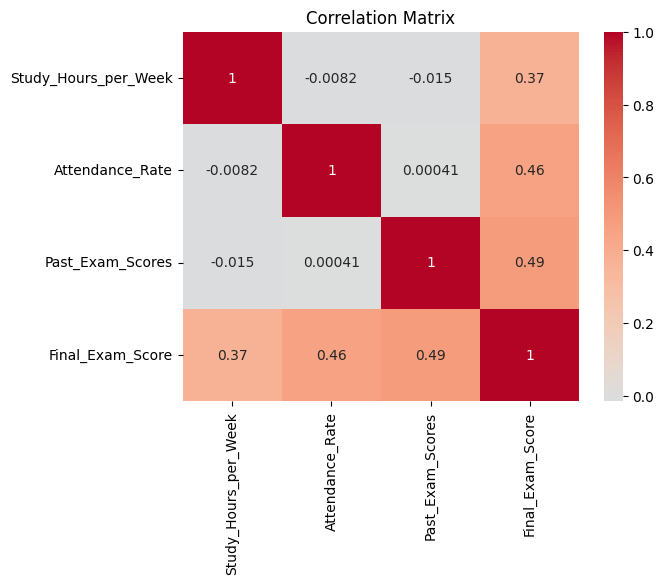

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

### Correlation Matrix Summary (Numerical -> Numerical) [Target: Final_Exam_Score]

- Past_Exam_Scores (r = 0.49) and Attendance_Rate (r = 0.46) show moderate positive correlation with Final_Exam_Score, indicating meaningful predictive relevance.
- Study_Hours_per_Week (r = 0.37) also demonstrates moderate association.

No significant correlation was observed between independent variables, suggesting absence of multicollinearity. Therefore, the dataset is suitable for linear regression modeling.

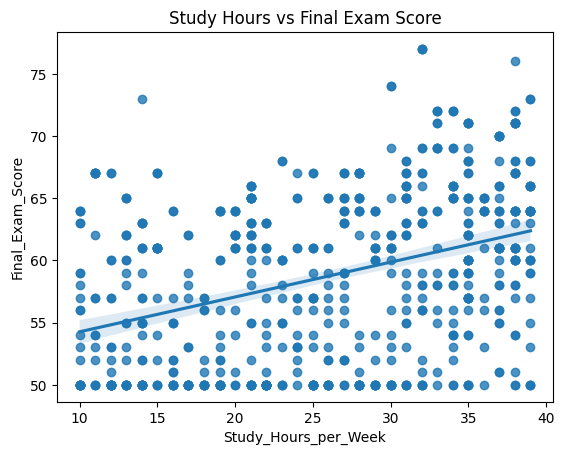

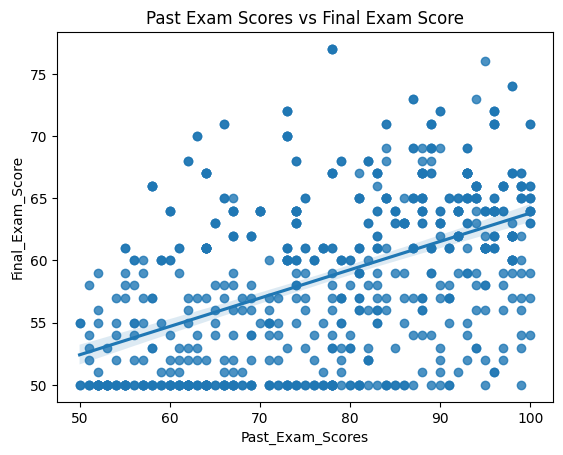

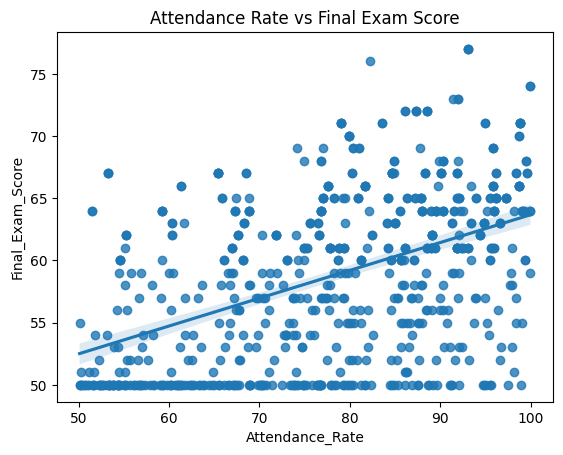

In [14]:
sns.regplot(x="Study_Hours_per_Week",y="Final_Exam_Score",data=df)
plt.title("Study Hours vs Final Exam Score")
plt.show()

sns.regplot(x="Past_Exam_Scores",y="Final_Exam_Score",data=df)
plt.title("Past Exam Scores vs Final Exam Score")
plt.show()

sns.regplot(x="Attendance_Rate",y="Final_Exam_Score",data=df)
plt.title("Attendance Rate vs Final Exam Score")
plt.show()

### Categorical -> Numerical (Final_Exam_Score)

For this analysis we will be using Group Mean Comparision and Boxplots.

In [15]:
categorical_cols = [
    "Gender",
    "Parental_Education_Level",
    "Internet_Access_at_Home",
    "Extracurricular_Activities"
]

for col in categorical_cols:
    print(f"\nMean Final Exam Score by {col}:")
    print(df.groupby(col)["Final_Exam_Score"].mean())


Mean Final Exam Score by Gender:
Gender
Female    58.978667
Male      58.537538
Name: Final_Exam_Score, dtype: float64

Mean Final Exam Score by Parental_Education_Level:
Parental_Education_Level
Bachelors      59.126984
High School    58.125683
Masters        59.590643
PhD            58.230303
Name: Final_Exam_Score, dtype: float64

Mean Final Exam Score by Internet_Access_at_Home:
Internet_Access_at_Home
No     58.853018
Yes    58.675841
Name: Final_Exam_Score, dtype: float64

Mean Final Exam Score by Extracurricular_Activities:
Extracurricular_Activities
No     58.326870
Yes    59.233429
Name: Final_Exam_Score, dtype: float64


In [18]:
from scipy.stats import f_oneway

for col in categorical_cols:
    groups = [group["Final_Exam_Score"].values 
              for name, group in df.groupby(col)]
    
    stat, p_value = f_oneway(*groups)
    
    print(f"\nANOVA result for {col}:")
    print("F-statistic:", stat)
    print("p-value:", p_value)


ANOVA result for Gender:
F-statistic: 0.7629866339108741
p-value: 0.38269248109543913

ANOVA result for Parental_Education_Level:
F-statistic: 1.9594993993391614
p-value: 0.11871441090484255

ANOVA result for Internet_Access_at_Home:
F-statistic: 0.12268901304679257
p-value: 0.7262406162659348

ANOVA result for Extracurricular_Activities:
F-statistic: 3.243852713881479
p-value: 0.07211847472679266


#### Analysis Result
- ANOVA analysis indicates that Gender, Parental Education Level, and Internet Access at Home do not significantly influence Final Exam Score (p > 0.05).
- Extracurricular Activities shows marginal influence (p ≈ 0.07) but is not statistically significant at the 5% level.
Therefore, these categorical variables will be excluded from linear modeling.

### Analysis for classification target (Pass_Fail)

#### Categorical -> Categorical (Pass_Fail)

In [19]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df["Pass_Fail"])
    stat, p, dof, expected = chi2_contingency(contingency)
    
    print(f"\nChi-square test for {col}")
    print("p-value:", p)


Chi-square test for Gender
p-value: 0.09761279564614528

Chi-square test for Parental_Education_Level
p-value: 0.2692523717479894

Chi-square test for Internet_Access_at_Home
p-value: 0.17480809465119346

Chi-square test for Extracurricular_Activities
p-value: 0.006800582300140371


##### Analysis Summary
- Chi-square analysis shows that Extracurricular_Activities has a statistically significant association with Pass/Fail outcome (p < 0.05).

- Gender, Parental Education Level, and Internet Access at Home do not show significant association (p > 0.05) and will be excluded from the classification model.

#### Numerical -> Categorical

In [21]:
from scipy.stats import ttest_ind

for col in numerical_cols:
    pass_group = df[df["Pass_Fail"]=="Pass"][col]
    fail_group = df[df["Pass_Fail"]=="Fail"][col]
    
    stat, p = ttest_ind(pass_group, fail_group)
    
    print(f"\nT-test for {col}")
    print("p-value:", p)


T-test for Study_Hours_per_Week
p-value: 7.327944378780683e-16

T-test for Attendance_Rate
p-value: 4.852668135517603e-28

T-test for Past_Exam_Scores
p-value: 2.5788606921932826e-34

T-test for Final_Exam_Score
p-value: 9.198485008694768e-213


##### Analysis Summary
- T-test analysis indicates that Study_Hours_per_Week, Attendance_Rate, and Past_Exam_Scores show statistically significant differences between pass and fail groups (p < 0.05).
- Final_Exam_Score was excluded from modeling due to data leakage, as Pass/Fail is derived from it.


## EDA Section Summary

1. Regression Model
- *Target*: Exam_Final_Score
- *Predictor Variables*: Past_Exam_Scores, Attendance_Rate, Study_Hours_per_Week
- *Excluded Features (For Prediction)*: Gender, Parental_Education_Level, Internet_Access_at_Home, Extracurricular_Activities

2. Classification Model
- *Target*: Pass / Fail
- *Predictor*: Study_Hours_per_Week, Attendance_Rate, Past_Exam_Scores, Extracurricular_Activities
- *Excluded Features*: Gender, Parental_Education_Level, Internet_Access_at_Home, Final_Exam_Score